# Math in The Machine

<img src= "./resources/muchmath.png" style = "width: 600px;">

## Objectives:

By the end of class students will be able to:
- summarize linear algebra in linear regression 
- define challenges of finding coefficient values
- describe how gradient decent and cost functions saves the day
 - define the *gradient* in gradient descent (hint, it's slope)
 - define the *descent* in gradient descent


### Let's start with...
<img src= "./resources/algebra.png">

### Algebra's from highschool, but that doesn't make it simple

#### Problem 1:
Solve for $x$</br>

$20  = 5 + 3x$

#### Problem 2:
Solve for $x$</br>

$20 - 7x = 6x - 6$

#### Problem 3
Solve for $x$ and $y$</br>

$-2(x - 1) + 4y = 5$

#### Problem 4
Solve for $x_1$ and $x_2$</br>

$4x_1 + 2x_2 = 8$</br>

$5x_1 + 3x_2 = 9$

### What are all these problems doing?

solving for the _unknown_

### Order of magnitude

Now Problem 4 might be doable by hand, but what if instead of 2 equations we had 5? 20? 200? 50,000?

### Fortunately for us we have

<img src= "https://media0.giphy.com/media/JlxFcvNuzlPYA/giphy.gif?cid=790b7611c4a4fc74c05cd06fe2c8cc00860e04b6f8049e52&rid=giphy.gif">

## Computers!


### But there is a problem:

| people | computers|
|--------|----------|
|can read equations like sentences | can't really do that |

### Linear albegra solves that problem, by turning this:

$4x_1 + 2x_2 = 8$</br>

$5x_1 + 3x_2 = 9$

### into this:

$
\begin{bmatrix}4 & 2 \\ 5 & 3 \end{bmatrix}*\begin{bmatrix}x_1\\x_2\end{bmatrix} = \begin{bmatrix}8\\9\end{bmatrix}
$ 

### Exercise, how would we rewrite the equation sets in each problem into linear algebra?

#### Problem 1

$x_0 + 2x_1 = 10$
</br>

$3x_0 + x_1 = 9$

#### Problem 2

$x_0 + 2x_1 = 10$</br>

$3x_0 + x_1 = 9$</br>

$32x_0 - 6x_1 = 24$

#### Problem 3
$x_0 + 2x_1 = 10$</br>

$3x_0 + x_1 + 5x_2= 22$</br>

$32x_0 - 6x_1 -4x_2= 7$


### We should probably learn some vocabulary for what we are using

#### Scalar

$ 2 $

#### Vector $\vec{v}$

$\begin{bmatrix}8\\9\end{bmatrix}$

Now what if I told you that **both** $a$ and $b$ are vectors?

$a = \begin{bmatrix}8\\9\end{bmatrix} \\              
b = \begin{bmatrix}8 & 9\end{bmatrix}$

How are they alike?

#### Matrix
$ \begin{bmatrix}4 & 2 \\ 5 & 3 \end{bmatrix} $

#### Tensor

$ \left[ \begin{array}{ccc} 
         \begin{bmatrix}4 & 2 \\ 5 & 3 \end{bmatrix} &
         \begin{bmatrix}6 & -4 \\ 2 & 8 \end{bmatrix} \\ 
         \begin{bmatrix}-1 & 5 \\ 0 & 1 \end{bmatrix} & 
         \begin{bmatrix}9 & -2 \\ -5 & 4/5 \end{bmatrix}  \end{array} \right]$

#### Or put differently:

<img src = "./resources/datadogs.jpg">

### Specific definitions of Data Types for Linear Algebra

* **Scalars** only have magnitude.

* A **vector** is an array with **magnitude and direction**.
  - The coordinates of a vector represent where the tip of the vector would be if you travelled from the origin
  - The **magnitude** of a vector would be its length in space.

* **Matrices** can be interpreted differently in different contexts but it's often used to represent multiple simultaneous vectors. 

* **Tensors** are made up of matrices with the same dimensions.

* A vector or matrix can be multiplied by a scalar to create a change in **scale** and/or **direction**.


## Quick code break!
For linear algebra, `NumPy` is your favorite package.

Vectors, matrices and tensors are represented by NumPy arrays. **Not lists!!!** <br>

We can use `np.array.shape` to explore the dimensions of these data structures.

#### Make some objects:

In [1]:
import numpy as np

In [2]:
vector = np.array([1, 2, 3, 4, 5, 6])
matrix1 = np.array([[1, 2, 3], [4, 5, 6]])
matrix2 = np.array([[1, 2], [3, 4], [5, 6]])
tensor = np.array([[[1, 2], [3, 4]], [[5, 6], [7, 8]]])

#### Print them out and find their shape

In [3]:
print(vector)
print('vector shape:', vector.shape, '\n')

[1 2 3 4 5 6]
vector shape: (6,) 



In [4]:
print(matrix1)
print('matrix1 shape:', matrix1.shape, '\n')

[[1 2 3]
 [4 5 6]]
matrix1 shape: (2, 3) 



In [5]:
print(matrix2)
print('matrix2 shape:', matrix2.shape, '\n')

[[1 2]
 [3 4]
 [5 6]]
matrix2 shape: (3, 2) 



In [6]:
print(tensor)
print('tensor shape:', tensor.shape, '\n')

[[[1 2]
  [3 4]]

 [[5 6]
  [7 8]]]
tensor shape: (2, 2, 2) 



#### Question: How would you index or subset a vector, matrix, or tensor?

#### Exercise:

Index each object to return the **6** for each one.

In [7]:
#__SOLUTION___
print(vector[5])
print(matrix1[1, 2])
print(matrix2[2, 1])
print(tensor[1,0,1])

6
6
6
6


## Okay, let's get back to the....

<img src= "./resources/linear.png">

## part of Linear Algebra

### What are Linear Equations?

Linear equations only have **linear variables**. This means our unknowns are only multiplied by a scalar and raised to a power of only **one**, such as:

$ x - 2y = 1$

$3ex + 2\pi y = 0$

**Not linear:**

$ x^2 - 2\ln{y} = 4$

$0.5x + 2y^x = 11$

$e^x + 2x=2$

## Linear Regression built upon Linear Algebra
A linear regression can be interpreted as the solution to a system of linear equations: each observation just corresponds to a linear equation, and the **coefficients** are the linear unknowns we're solving for! 

We're representing each **observation** as a **linear combination of features**.

Our prediction equation for a linear regression typically looks something like:

$ y_{pred} = \beta_{0} + \beta_{1}x_1 + \beta_{2}x_2 + ... + \beta_{n}x_n $

### In matrix notation that can also be:

$ y = Xb $, so we are solving for $b$.

Where:
- $X$ is your matrix of scalars
- $b$ is the vector of coefficients

Okay, specifically we are solving for $\hat{b}$:

$ \hat{y} = X\hat{b}$

to:

$\min\Sigma{(\hat{y} - y)^2}$

## Pause

<img src= "https://i0.wp.com/timemanagementninja.com/wp-content/uploads/2014/02/Pause-Button-Key.jpg?w=600&ssl=1">

## That was a lot, let's make sure everyone followed with that knowledge drop.

## Linear Algebra powers the majority of machine learning algorithms we will learn in this course

## MVPs of Linear Algebra
<img src = "./resources/mvp.jpeg">

### 1. Identity Matrix
An identity matrix is a square with a diagonal of 1's moving from left to right and the remaining numbers 0. When a matrix is multiplied by an identity matrix, it will result in the same matrix (think of it as the operational equivalent to 1 for linear algebra).

<img src = "./resources/identity_matrix.svg">

In [8]:
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [9]:
i_3 = np.identity(3)
print(i_3)

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


### 2. Matrix Inverse
The **inverse** of a matrix, when a matrix is multiplied by its inverse, it results in the identity matrix. 

<img src = "./resources/inverse.webp">

The order of multiplication does not matter for a matrix and its inverse:

$$A \cdot A^{-1} = A^{-1} \cdot A $$



In [10]:
# original matrix
x = np.array([[4,8,10],[3,9,12],[5,10,15]])

In [11]:
# inverse of x and multiplying by x
inv_x = np.linalg.inv(x)
print(inv_x, '\n')

[[ 5.00000000e-01 -6.66666667e-01  2.00000000e-01]
 [ 5.00000000e-01  3.33333333e-01 -6.00000000e-01]
 [-5.00000000e-01 -7.40148683e-17  4.00000000e-01]] 



In [12]:
# see if it produces the identity matrix:
print(np.round(x.dot(inv_x)))

[[ 1.  0.  0.]
 [-0.  1.  0.]
 [-0. -0.  1.]]


In [13]:
print(matrix1)
print(matrix2)
matrix1.dot(matrix2)

[[1 2 3]
 [4 5 6]]
[[1 2]
 [3 4]
 [5 6]]


array([[22, 28],
       [49, 64]])

In [14]:
np.dot(matrix2,matrix1)

array([[ 9, 12, 15],
       [19, 26, 33],
       [29, 40, 51]])

### 2.a Do all matricies have an inverse?  Nope. 

    An n-by-n square matrix A is called invertible if there exists an N by N square matrix B such that

<div style="text-align:center"><span style="color:blue; font-family:Georgia; font-size:1.5em;">AB = BA = I</span></div>

    where I is the identity matrix. A and B are inverses of each other.

#### Wait, what was that last function `x.dot` ?
### 3. Dot product

The dot product of matrices is also commonly known as **Matrix Multiplication**. Unless otherwise stated, _multiplication_ refers to this kind of multiplication.


\begin{equation}
\begin{bmatrix}
a_{1,1} & a_{1,2} \\
a_{2,1} & a_{2,2}
\end{bmatrix}
\times
\begin{bmatrix}
b_{1,1} & b_{1,2} \\
b_{2,1} & b_{2,2}
\end{bmatrix}
=
\begin{bmatrix}
a_{1,1}\times b_{1,1} + a_{1,2}\times b_{2,1} & a_{1,1}\times b_{1,2} + a_{1,2}\times b_{2,2} \\
a_{2,1}\times b_{1,1} + a_{2,2}\times b_{2,1} & a_{2,1}\times b_{1,2} + a_{2,2}\times b_{2,2}
\end{bmatrix}
\end{equation}

<img src= "./resources/matrix_mult.png" style="width: 400px;">
https://www.mathsisfun.com/algebra/matrix-multiplying.html

#### Dot product rules:
- We take the **rows** (horizontal) of the first matrix and do an element-wise product with the **columns** (vertical) of the second matrix.
- Order of operations matters, $AB ≠ BA $  and $(AB)C ≠ A(BC)$.

#### Exercise:

Let's do one small dot product by hand! (this is the most matrix math you will be asked to do)

$\begin{bmatrix}8\\5\\6\end{bmatrix} * \begin{bmatrix}3 & 4 & 2 \end{bmatrix}  = ?$

In [15]:
#__SOLUTION__
(3*8) + (5*4) + (6*2)

56

### 4. Transpose

The _transpose_ of Matrix $X$, or using notation, $X^{T}$, is matrix $X$ in reverse shape order.

$a = \begin{bmatrix}8\\9\end{bmatrix} \\              
a^T = \begin{bmatrix}8 & 9\end{bmatrix}$

Calling `.transpose()` on an array **reverses** the shape order of a matrix.

In [16]:
# the original shape of matrix1
print(matrix1)
print('matrix1 shape:', matrix1.shape, '\n')

[[1 2 3]
 [4 5 6]]
matrix1 shape: (2, 3) 



In [17]:
# transposed
print(matrix1.transpose(), '\n')
print('matrix1.transpose() shape:', matrix1.transpose().shape)

[[1 4]
 [2 5]
 [3 6]] 

matrix1.transpose() shape: (3, 2)


There is also the shorthand function of `.T`

In [18]:
print(matrix1.T)

[[1 4]
 [2 5]
 [3 6]]


#### Exercise
(again, by hand!)

What would be the transpose of the following matrix?

$\begin{bmatrix}8 & 2\\5 & 3\\6&4\end{bmatrix} $

### Why do we care about these MVPs?
![gif](https://media1.giphy.com/media/QA7C1yuI0QZtBbxxM4/giphy.gif)

### Linear Algebra Solves the Best-Fit Line Problem

If we have a matrix of predictors $X$ and a target column $y$, we can express $\hat{y}$, the best-fit line, as  follows:

$\large\hat{y} = (X^TX)^{-1}X^Ty$.


Let's see this in action:

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
preds = np.array(list(zip(np.random.normal(size=10),
                          np.array(np.random.normal(size=10, loc=2)))))
target = np.array(np.random.exponential(size=10))

In [21]:
np.linalg.inv(preds.T.dot(preds)).dot(preds.T).dot(target)

array([0.22772868, 0.54632145])

In [22]:
LinearRegression(fit_intercept=False).fit(preds, target).coef_

array([0.22772868, 0.54632145])

### Linear algebra is used everywhere in machine learning:

#### Regression

We've already covered it. Anywhere you are using a multi-dimensional dataset and optimizing a cost fuction, or transforming the data - linear algebra is how the calculations are run.


#### Text Analytics
It is used to model complicated things like language. </br>
Some of you may have heard of "vectorizing text" when talking about NLP.

Converting words and text into vectors and matricies allows us to see how "close" and "far apart" words are from eachother in meaning and connection.

<img src = "./resources/Word-Vectors.png">

#### Image compression and recognition

At its basest form, an image is a three dimensional matrix.

An $n$ by $m$ by $3$ matrix to be precise.

Where $n$ and $m$ are the size of the image and each pixel is an array of three digits represeting its color code.

<img src = "./resources/images.gif">

#### Recommendation engines 
Can make much more sophisticated recommendations by using linear algebra in conjunction with user and content data.

<img src = "./resources/netflix.png">

### Additional Resources on Linear Algebra
* 3 Blue 1 Brown:  https://www.youtube.com/playlist?list=PLZHQObOWTQDPD3MizzM2xVFitgF8hE_a
* Matrix approach to Linear Regression: http://www.stat.columbia.edu/~fwood/Teaching/w4315/Fall2009/lecture_11
* [link to fun desmos interaction](https://www.desmos.com/calculator/yovo2ro9me)
* [Link to good video on scalars and vectors](https://www.youtube.com/watch?v=fNk_zzaMoSs&list=PLZHQObOWTQDPD3MizzM2xVFitgF8hE_ab)
* [What is X^T * X?](https://stats.stackexchange.com/questions/267948/intuitive-explanation-of-the-xtx-1-term-in-the-variance-of-least-square/267963)

https://www.desmos.com/calculator/y08wwbjwid

<img src= "./images/grad-desc-text.png" style = "width: 600px;">

<img src= "./images/muchmath.png" style = "width: 600px;">

## Main goal
Enough to conceptually _explain_ it, no expectation to _recode it from scratch_

### Part 1: Linear Regression
### Remember, Linear albegra turns these equations:

$4x_1 + 2x_2 = 8$</br>

$5x_1 + 3x_2 = 9$

### into this:

$
\begin{bmatrix}4 & 2 \\ 5 & 3 \end{bmatrix}*\begin{bmatrix}x_1\\x_2\end{bmatrix} = \begin{bmatrix}8\\9\end{bmatrix}
$ 

### In linear regression using linear algebra:

We're representing each **observation** as a **linear combination of features**.

So if we were using an Auto dataset to predict **mpg** from *cylinders, displacement, horsepower, weight, acceleration and year*, we see the data like this:


![data](./images/data.png)

And if we know we want to find a linear regression formula that looks like:

$ y_{pred} = \beta_{0} + \beta_{1}x_1 + \beta_{2}x_2 + ... + \beta_{n}x_n $


### How does the computer represent the observations and betas in the form of linear algebra?

#### Exercise: write it out using what we have above


.. I'll wait.

## Challenge:

Okay, so how do we find the betas? How do we find the coefficients?

Let's start with a more simple example and come back to our mpg later.



We've learned previously that for regression we find the minimum sum of squares:

### Regression and Sum of Squares

#### Generating some data to make a mini-regression problem
#### This will be quick, it's more about the last graph

In [23]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [24]:
x = [1, 1, 2, 3, 4, 3, 4, 6, 4]
y = [2, 1, 0.5, 1, 3, 3, 2, 5, 4]

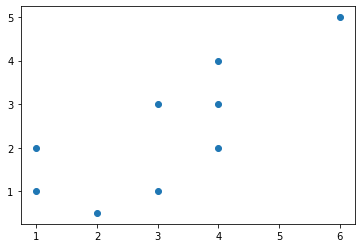

In [25]:
fig, ax = plt.subplots()
ax.scatter(x,y)
plt.show()


### Playing around with parameters to find the line of best fit
#### We know in theory how to find the best SINGLE coefficient - change it around and see what works!!!!



<p style='text-align:center;font-size:20px'>$h_\theta(x) = \theta_0 + \theta_1 x $</p>

<p style='text-align:center;font-size:20px'>$ Y = \beta_0  + \beta_1 x $</p>

In [26]:
beta_0 = 0

In [27]:
beta_1 = [.25, .5, .75, .8, 1,]

#### Trying different values of $b_1$ to see which works best

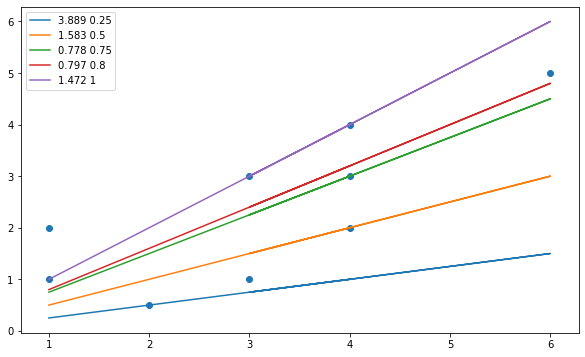

In [28]:
## Generating predictions and cost function values
from sklearn.metrics import mean_squared_error

fig, ax = plt.subplots(figsize=(10,6))
mses = []
for t in beta_1:
    line = beta_0 + (np.array(x)*t)
    # Our cost function
    mse = round(mean_squared_error(y, line),3)
    mses.append(mse)
    ax.plot(x, line, label=f'{mse} {t}')
    
ax.scatter(x,y)
plt.legend()
plt.show()

### Plot the Cost Curve

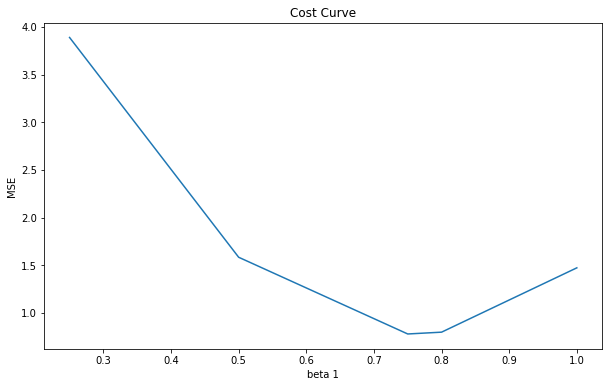

In [29]:
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(beta_1, mses)
ax.set_title('Cost Curve')
ax.set_xlabel('beta 1')
ax.set_ylabel('MSE')
plt.show()

And we see that a $b_1$ around 7.5 works best.

**QUICK CHECK**:  What do I mean by "Best"??? </br>

## Challenge
**AND**:  How do we do this for more than one coefficient at the same time??

## GRADIENT DECENT to the RESCUE!!

![costcurve](./images/Gradie_Desce.jpg)


#### **QUESTION** - What's the third axis?
#### **another QUESTION** - What's that curvy thing?"


## Third Axis:  Loss, cost and objective functions

Review: What is cost?  

<p style='text-align:center;font-size:20px'>$MSE = \frac{1}{m}\sum_{i=1}^m (Y_i - \hat Y_i)^2 $</p>

https://stats.stackexchange.com/questions/179026/objective-function-cost-function-loss-function-are-they-the-same-thing

## Challenge: How do we find the lowest points?

### Option 1: Point and pick.
We have a graph. Pick it!<br>
Anyone see any problems with that? Would that work in more than two dimensions?

### Option 2: do the math for every point and do a min() function
Okay, also an option. <br>
Anyone see any issues with data storage? Time to process?

### Option 3: A quicker way. Math.
Let's use some calculus!!!


<h1 style='text-align:center'>Calculus</h1>

### What are the steps we take to get to the "bottom" of the curve? 

<img src='./images/ralph.gif'/> 

## Gradient Descent to the rescue

Gradient descent is an <b>algorithm</b> used to find the lowest point of a function (remember we are talking about our 
**cost function** here). </br>

It is a process that helps us **change** our parameters (coefficients) <br>
until we get the **optimal** parameters( again, coefficients) of our function<br>
(the **lowest** value of our cost function). 

### Quick concept - 

In the diagram above, there are TWO parameters ( $b_0$ for $x_0$  and $b_1$ for $x_1$ ), so our **cost function** is in a THREE dimensional space. 

The cost function will always be a plane in an $n+1$ dimesional space, where $n$ is the number of coefficients you are trying to find.

How do we go about changing our parameters? 

The Steps:

    - Start with your parameters at any arbitrary value
    - Find the gradient at that point (how steep is the curve) 
    - Multiply Learning Rate * Gradient - to calculate the amount you want to change 
    - Subtract above value from current parameter to create new parameter estimate
    - Repeat until gradient is ~ 0

### In theory, the process of finding the optimal coefficients will look something like this:

<img src= "https://thumbs.gfycat.com/GentleEquatorialDove-size_restricted.gif" >



### Step 1 - Pick a random value of one of the coefficients

<img src='./images/gradient_desc-step1.png'/>

### Step 2 - Find the _gradient_ at that point on the curve
![slope](./images/gradient_desc_step2.png)

### GRADIENT

The gradient is just **derivatives**. </br>
The **derivative** of any point on a **curve** is the **slope** at that point.

### Step 3 - Change the value of the coefficient by a set amount (_learning rate_)
They give us how much things change when we make a tiny step.<br>

![slope](./images/gradient_desc_step3.png)

#### Do we choose weight A or weight B?
#### In which direction do we go?

### Step 4 - Change the value of the coefficient to Option A
You want to pursue the lower gradient.<br>

![slope](./images/gradient_desc.png)

### Step 5 - Find the place on the curve where the derivative is zero
#### For example, at each labeled point on this curve, the derivative is zero.

![minmax](./images/maxandmin.png)


The derivative of a function at its lowest point is **zero**<br>
The closer we get to the lowest point the lower our derivative will be<br>

### But what if our steps are too big and we miss the minima?
![alt text](./images/bigsteps.png)

### Change step size as derivative gets smaller

When the derivative is **large** we will change our parameters/coefficients **by more** to speed up the process<br>

When the derivative is **small** we will change our parameters/coefficients **by less** to not overshoot the optimal value<br>

#### Take baby steps.

![baby](https://i.imgur.com/oIK0FyE.gif)

### Multiple Parameters?
#### only small change in approach

When dealing with multiple parameters we need to use partial derivatives. 

<img style='width:500px' src='./images/gradient.png'/>

<img src="./images/RSSbowl.png" alt="drawing" width="500"/>

Each partial derivative tells us how much a small change in the parameter will affect the cost. Same as before.<br>
Now we know how much we need to change our parameters. 

### DESCENT

### Learning Rate 

The learning rate helps us "soften" the amount of change we apply to a parameter?</br> Why might we want to do this? 

### Get out those laptops!
#### Exercise:

We are going to divide the room into three sections:
- small, learning rate = 0.05
- medium, learning rate = 1.4
- large, learning rate = 3.5

Working in pairs, to use this website: </br>
https://developers.google.com/machine-learning/crash-course/fitter/graph

And do the following steps:
- set the learning rate to your group's learning rate
- click "step" as many times as it takes to reach the blue star
- report out on how many steps it took to reach the global min and take note of any strange behavior.

I'll give you a few minutes to do this.

#### Report out:
- people with the small learning rate, how many steps did it take?
- how about medium?
- how about large?

What behavior did you see?

### The Formula

The process of iteratively changing the coefficients can be described with this formula:

<img stycle='width:700px' src='./images/GD_formula.png' />

$ \alpha $ represents the learning rate and chosen before you start the "learning" process

$ \theta_j $ is the coefficient you are adjusting

$ \frac{\partial J(\theta)}{\partial\theta_j} $ is the partial derivative used to find the slope of the cost function at any value of the coefficient. 


### Let's pause and make sure we are all stilll together

![pause](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSE-Q6G4qkF9u1tg9qYYHpf0JwMb_uuaiL6m8p6wfimqkAgOcVb8w&s)

Quick **Fist of five** - show me all 5 fingers if you absolutely understand all of this, zero if you are complete lost, and any corresponding number in between.

## Problems With Gradient Descent

### **Problem 1**: Local Minima

Local minima occur when there are multiple minimum points in your cost function :

<img stycle='width:700px' src='./images/minima.jpg' />

### Thoughts on how to address this problem?
let's take a few thoughts from the class.</br>

.</br>

.</br>

.</br>

#### Answer: run it multiple times with different starting points to see if same coefficients are found.

This is also why we set the seed in some exercises to ensure we all get the same results.

### **Problem 2**: Convergence

We keep repeating the steps above until your parameters stop changing aka there is no more gradient. 

# Appendix 1: doing the maths out, for those who love the maths.

#### From our original cost function

<p style='text-align:center;font-size:20px'>$MSE = \frac{1}{m}\sum_{i=1}^m (\hat Y_i - Y_i)^2 $</p>
<p style='text-align:center;font-size:20px'>$\hat Y = \theta_0 + \theta_1 x $</p>
<p style='text-align:center;font-size:20px'>$MSE = \frac{1}{m}\sum_{i=1}^m (\theta_0 + \theta_1 x_i - Y_i)^2 $</p>

#### Applying the chain rule in each partial derivative<br>
<p style='text-align:center;font-size:20px'>$ J(\theta_0, \theta_1) = \frac{1}{m}\sum_{i=1}^m (\theta_0 + \theta_1 x_i - Y_i)^2 $</p>

When derivating on the intercept:
<p style='text-align:center;font-size:20px'>$ \frac{\partial J(\theta_0, \theta_1)}{\partial\theta_0} = \frac{2}{m} \sum_{i=1}^m \theta_0 + \theta_1 x_i - Y_i$<br>

When derivating on a weight:
<p style='text-align:center;font-size:20px'>$ \frac{\partial J(\theta_0, \theta_1)}{\partial\theta_1} = \frac{2}{m} \sum_{i=1}^m (\theta_0 + \theta_1 x_i - Y_i) * x_i $

Or from an algebra / matricial perspective:

<p style='text-align:center;font-size:20px'>$ \frac{dJ(\theta)}{d\theta} = \frac{2}{m}  X^T*LossVector $
    
![alt text](./images/vectorofpartialderivative.png)

# Appendix 2: Gradient descent in four lines of code (the core anyway...)

In [30]:
from statsmodels.tools.tools import add_constant
import seaborn as sns

def gradientDescent(x, y, theta, alpha, m, numIterations):
    x = add_constant(x)
    xTrans = x.T
    costs = []
    for i in range(0, numIterations):
        preds = x@theta
        loss = preds - y
        gradient = xTrans@loss * (2 / m)
        theta = theta - alpha * gradient
        
    # Showing cost reduction overtime
        cost = np.sum(loss ** 2) / m
        
        if i % 1000 == 0:
            print("Iteration %d | Cost: %f" % (i, cost))
            print(theta)
            costs.append(cost)
    sns.scatterplot(y = costs, x = [i for i in range(len(costs))])

Iteration 0 | Cost: 20.706023
[1.90509378 1.53121866]
Iteration 1000 | Cost: 1.268529
[1.56410349 0.44579425]
Iteration 2000 | Cost: 1.127592
[1.4920442  0.37455617]
Iteration 3000 | Cost: 1.102196
[1.44225977 0.3807368 ]
Iteration 4000 | Cost: 1.079196
[1.39575899 0.39244575]
Iteration 5000 | Cost: 1.057807
[1.35102814 0.4041795 ]
Iteration 6000 | Cost: 1.037913
[1.30789704 0.41552981]
Iteration 7000 | Cost: 1.019408
[1.26630057 0.42647904]
Iteration 8000 | Cost: 1.002197
[1.22618352 0.43703908]
Iteration 9000 | Cost: 0.986187
[1.18749322 0.44722356]


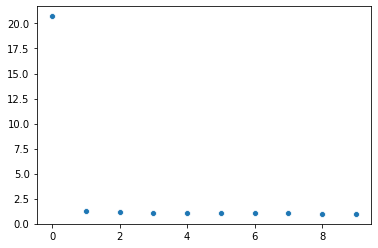

In [31]:
m = len(x) 
numIterations= 10000
alpha = 0.0001
theta = np.array([1.90595185,1.5342646])
gradientDescent(x, y, theta, alpha, m, numIterations) # [ 0.28623922 46.7549264 ]

## Appendix 3: Speed comparison

In [32]:
import numpy as np
from sklearn import linear_model
from sklearn.datasets import make_regression

In [33]:
x,y,c = make_regression(1000000,2,random_state=1000,coef=True)
c

array([ 1.50608238, 87.99340912])

In [34]:
%%time
ols = linear_model.LinearRegression()
ols.fit(x, y)
print(f'theta_0: {ols.intercept_}')
print(f'theta: {ols.coef_}')

theta_0: 1.6514567491299204e-15
theta: [ 1.50608238 87.99340912]
CPU times: user 193 ms, sys: 14.9 ms, total: 208 ms
Wall time: 56.4 ms


In [ ]:
%%time
gd = linear_model.SGDRegressor(alpha=.0001, max_iter=1000, tol=None
                              )
gd.fit(x,y)
print(f'theta_0: {gd.intercept_[0]}')
print(f'theta_1: {gd.coef_[0]}')

## Resources

[Understanding the Mathematics Behind Gradient Descent](https://towardsdatascience.com/understanding-the-mathematics-behind-gradient-descent-dde5dc9be06e)
